<a href="https://colab.research.google.com/github/mehdihg/ml-challenge/blob/main/KMeans_Algorithm_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hi**
Since the challenge dataset does not have a target label for training and only has two features X and Y, the model should be handled according to unsupervised learning algorithms.
And the closest and most logical algorithm in this field that fits our challenge is KMeans Algorithm.

# **Import library**
Import pandas, numpy, matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Read dataset**
Read and look at the nature of the data

   feature_1  feature_2
0         39         15
1         81         15
2          6         16
3         77         16
4         40         17
        feature_1   feature_2
count  200.000000  200.000000
mean    50.200000   60.560000
std     25.823522   26.264721
min      1.000000   15.000000
25%     34.750000   41.500000
50%     50.000000   61.500000
75%     73.000000   78.000000
max     99.000000  137.000000


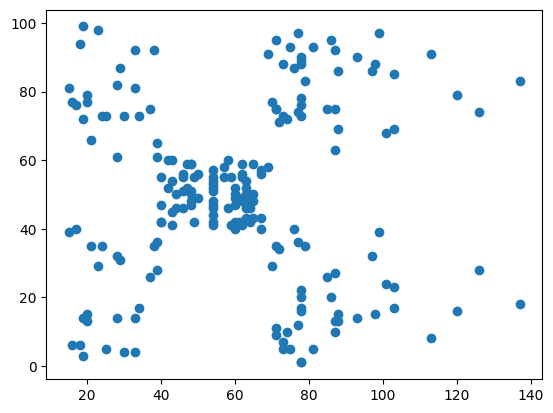

In [4]:
# read DataSet and copy
df = pd.read_csv('./rc_task_2.csv')
df_copy = df

# overview of the DataSet
print(df.head())
print(df.describe())

plt.scatter(df_copy['feature_2'], df_copy['feature_1'])


# **KMeans From Scratch**
K-means clustering is an unsupervised learning algorithm, which groups an unlabeled dataset into different clusters. The "K" refers to the number of pre-defined clusters the dataset is grouped into.

So it can be said that this algorithm is suitable for the requested challenge.

Plainly, the algorithm entails the following steps:

    1. Randomly initialize K cluster centroids i.e. the center of the clusters.
    2. Repeat till convergence or end of max number of iterations:
        1. For samples i=1 to m in the dataset:
            - Assign the closest cluster centroid to X[i]
        2. For cluster k=1 to K:
            - Find new cluster centroids by calculating the mean of the points assigned to cluster k.

In [5]:
#1. Randomly initialize K cluster centroids by picking K samples from Data
def initialize_random_centroids(K, X):
    m, n = np.shape(X)
    # a centroid should be of shape (1, n), so the centroids array will be of shape (K, n)
    centroids = np.empty((K, n))
    # pick indices of K samples, with replacement, from the training data
    centroid_indices = np.random.choice(m, size=K, replace=False)
    for i in range(K):
        centroids[i] =  X[centroid_indices[i]]
    return centroids

#2. Calculate euclidean distance between two vectors
def euclidean_distance(x1, x2):
    # calculates and returns the euclidean distance between two vectors x1 and x2
    # return np.sqrt(np.sum(np.power(x1 - x2, 2)))
    return np.linalg.norm(x1 - x2)

#3. Finding the closest centroid to a given data point
def closest_centroid(x, centroids, K):
    # finds and returns the index of the closest centroid for a given vector x
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance

#4. Create clusters
def create_clusters(centroids, K, X):
    # returns an array of cluster indices for all the data samples
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx

#5. Compute means
def compute_means(cluster_idx, K, X):
    # computes and returns the new centroids of the clusters
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        points = X[cluster_idx == i] # gather points for the cluster i
        centroids[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centroids

#6. Finally function
def Kmeans(K, X, max_iterations=500):
    # runs the K-means algorithm and computes the final clusters
    # initialize random centroids
    centroids = initialize_random_centroids(K, X)
    # loop till max_iterations or convergance
    for _ in range(max_iterations):
        # create clusters by assigning the samples to the closet centroids
        clusters = create_clusters(centroids, K, X)
        # previous centroids
        previous_centroids = centroids
        # compute means of the clusters and assign to centroids
        centroids = compute_means(clusters, K, X)
        # if the new_centroids are the same as the old centroids, return clusters
        diff = previous_centroids - centroids

        if not diff.any():
            return clusters, centroids
    return clusters, centroids


# **Display on the plot**
Display clustered data and centers of clusters on the plot

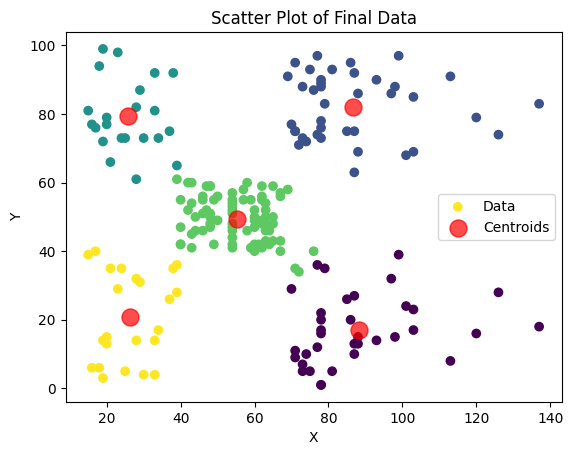

In [6]:
# convert DataFrame to array
df_copy_arr = df_copy.to_numpy()
# call Kmeans function
clusters, centroids = Kmeans(5, df_copy_arr, 500)
# display on the plot
plt.scatter(df_copy['feature_2'], df_copy['feature_1'], c=clusters, label = 'Data')
plt.scatter(centroids[:,1], centroids[:,0], s=150, alpha=0.7, c='r', label = 'Centroids')
plt.title('Scatter Plot of Final Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# **Add team_number**
bold textbold textAdding the team_number as a feature to the main DataFrame

In [7]:
df['team_number'] = np.int_(clusters)
df.to_csv('rs_task_2.csv', index=False)